In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import product
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

In [ ]:
print("Loading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)
X = X / 255.0
y_bin = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

Loading MNIST...


In [ ]:
print("\nTuning PCA...")
pca_params = {'n_components': [0.90, 0.95, 0.98]}
best_pca, best_score = None, -1

for comp in pca_params['n_components']:
    pca = PCA(n_components=comp, random_state=42)
    X_train_pca_tmp = pca.fit_transform(X_train)
    X_test_pca_tmp = pca.transform(X_test)
    
    lr = LogisticRegression(max_iter=300, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_pca_tmp, y_train)
    acc = lr.score(X_test_pca_tmp, y_test)
    print(f"PCA n_components={comp}: Accuracy={acc:.4f}")
    
    if acc > best_score:
        best_score = acc
        best_pca = pca

X_train_pca = best_pca.transform(X_train)
X_test_pca = best_pca.transform(X_test)
print(f"Selected PCA components: {best_pca.n_components_}")



Tuning PCA...


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


PCA n_components=0.9: Accuracy=0.9144


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


PCA n_components=0.95: Accuracy=0.9208


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


PCA n_components=0.98: Accuracy=0.9209
Selected PCA components: 260


In [4]:
print("\nTuning RBM...")
rbm_params = {
    'n_components': [100, 200],
    'learning_rate': [0.01, 0.05],
    'n_iter': [10, 20]
}

best_rbm, best_rbm_score = None, -1
X_train_bin = np.where(X_train > 0.5, 1, 0)
X_test_bin = np.where(X_test > 0.5, 1, 0)

for n_c, lr, n_it in product(rbm_params['n_components'], rbm_params['learning_rate'], rbm_params['n_iter']):
    print(f"Trying RBM: n_components={n_c}, learning_rate={lr}, n_iter={n_it}")
    rbm = BernoulliRBM(n_components=n_c, learning_rate=lr, n_iter=n_it, random_state=42)
    X_train_rbm_tmp = rbm.fit_transform(X_train_bin)
    X_test_rbm_tmp = rbm.transform(X_test_bin)
    
    lr_model = LogisticRegression(max_iter=300, solver='lbfgs', multi_class='multinomial')
    lr_model.fit(X_train_rbm_tmp, y_train)
    acc = lr_model.score(X_test_rbm_tmp, y_test)
    print(f"RBM Accuracy: {acc:.4f}")
    
    if acc > best_rbm_score:
        best_rbm_score = acc
        best_rbm = rbm

X_train_rbm = best_rbm.transform(X_train_bin)
X_test_rbm = best_rbm.transform(X_test_bin)
print(f"Selected RBM params: n_components={best_rbm.n_components}, learning_rate={best_rbm.learning_rate}, n_iter={best_rbm.n_iter}")



Tuning RBM...
Trying RBM: n_components=100, learning_rate=0.01, n_iter=10


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9269
Trying RBM: n_components=100, learning_rate=0.01, n_iter=20


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9259
Trying RBM: n_components=100, learning_rate=0.05, n_iter=10


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9239
Trying RBM: n_components=100, learning_rate=0.05, n_iter=20


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9280
Trying RBM: n_components=200, learning_rate=0.01, n_iter=10


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9496
Trying RBM: n_components=200, learning_rate=0.01, n_iter=20


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9507
Trying RBM: n_components=200, learning_rate=0.05, n_iter=10


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9524
Trying RBM: n_components=200, learning_rate=0.05, n_iter=20


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM Accuracy: 0.9534
Selected RBM params: n_components=200, learning_rate=0.05, n_iter=20


In [5]:
print("\nTuning Logistic Regression...")
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=500, multi_class='multinomial'), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
best_logreg = grid.best_estimator_
print(f"Best Logistic Regression Params: {grid.best_params_}")


Tuning Logistic Regression...


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression Params: {'C': 0.1, 'solver': 'lbfgs'}


In [6]:
# Classification
classifiers = {
    "TunedLogisticRegression": best_logreg
}
results = {}

for version, (Xtr, Xte) in {
    "Original": (X_train, X_test),
    "PCA": (X_train_pca, X_test_pca),
    "RBM": (X_train_rbm, X_test_rbm)
}.items():
    print(f"\n--- {version} Features ---")
    results[version] = {}
    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name}...")
        clf.fit(Xtr, y_train)
        y_pred = clf.predict(Xte)
        acc = accuracy_score(y_test, y_pred)
        results[version][clf_name] = {
            'model': clf,
            'preds': y_pred,
            'acc': acc
        }
        print(f"{clf_name} Accuracy: {acc:.4f}")



--- Original Features ---
Training TunedLogisticRegression...


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


TunedLogisticRegression Accuracy: 0.9217

--- PCA Features ---
Training TunedLogisticRegression...


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


TunedLogisticRegression Accuracy: 0.9206

--- RBM Features ---
Training TunedLogisticRegression...


C:\Users\kanih\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


TunedLogisticRegression Accuracy: 0.9511


In [ ]:
for version in results:
    for clf_name, res in results[version].items():
        print(f"\n=== {version} - {clf_name} ===")
        print(f"Accuracy: {res['acc']:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, res['preds']))


=== Original - TunedLogisticRegression ===
Accuracy: 0.9217
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.92      0.89      0.91      1398
           3       0.90      0.90      0.90      1428
           4       0.93      0.92      0.93      1365
           5       0.89      0.87      0.88      1263
           6       0.93      0.96      0.95      1375
           7       0.94      0.94      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.90      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000


=== PCA - TunedLogisticRegression ===
Accuracy: 0.9206
Classification Report:
              precision    recall  f1-score   support

           0       0.95

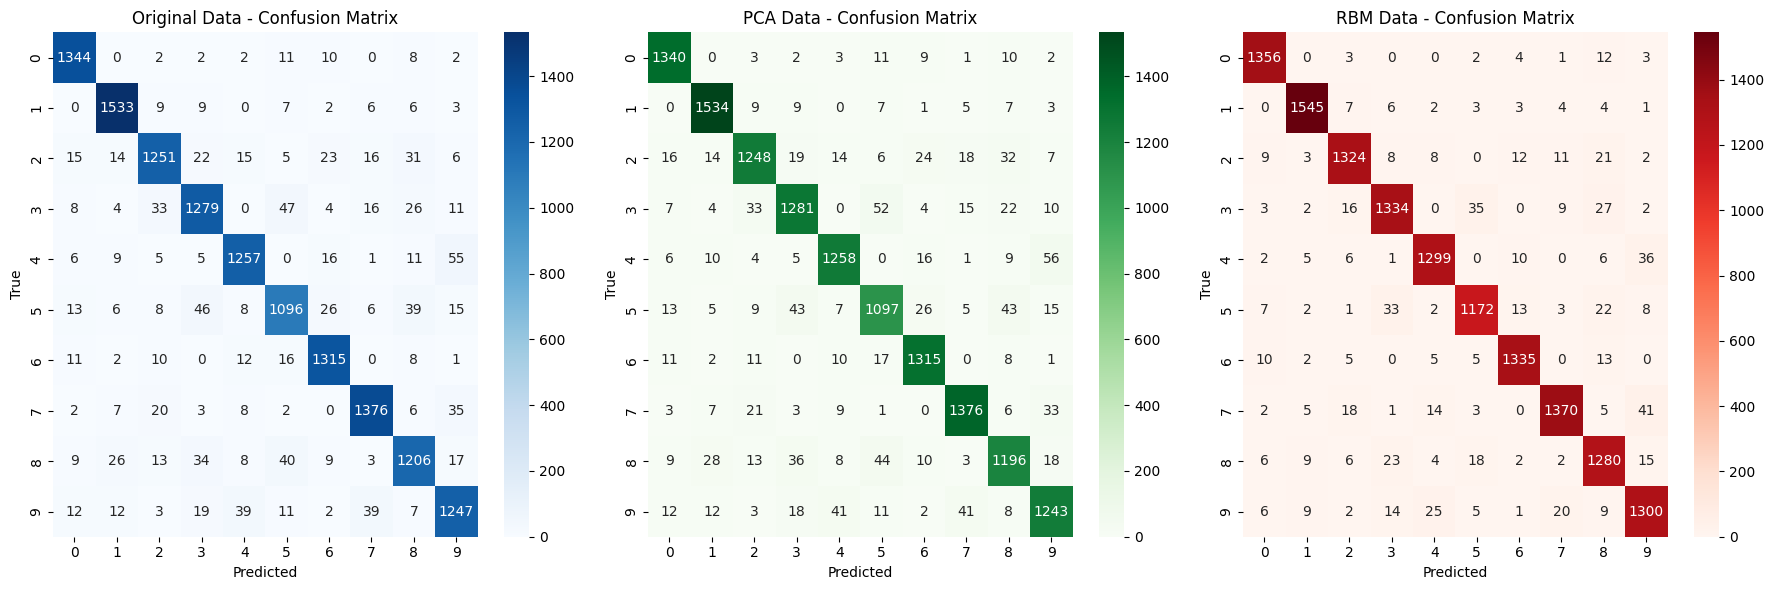

In [ ]:
y_pred_orig = results["Original"]["TunedLogisticRegression"]["preds"]
y_pred_pca = results["PCA"]["TunedLogisticRegression"]["preds"]
y_pred_rbm = results["RBM"]["TunedLogisticRegression"]["preds"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_orig), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Original Data - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("PCA Data - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_rbm), annot=True, fmt='d', cmap="Reds", ax=axes[2])
axes[2].set_title("RBM Data - Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")

plt.tight_layout()
plt.show()

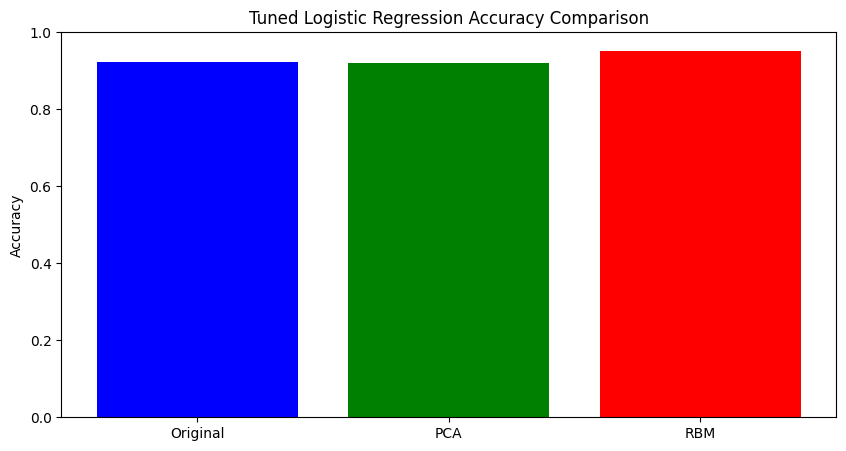

In [ ]:
orig_acc = accuracy_score(y_test, y_pred_orig)
pca_acc = accuracy_score(y_test, y_pred_pca)
rbm_acc = accuracy_score(y_test, y_pred_rbm)

plt.figure(figsize=(10, 5))
plt.bar(["Original", "PCA", "RBM"], [orig_acc, pca_acc, rbm_acc], color=["blue", "green", "red"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Tuned Logistic Regression Accuracy Comparison")
plt.show()

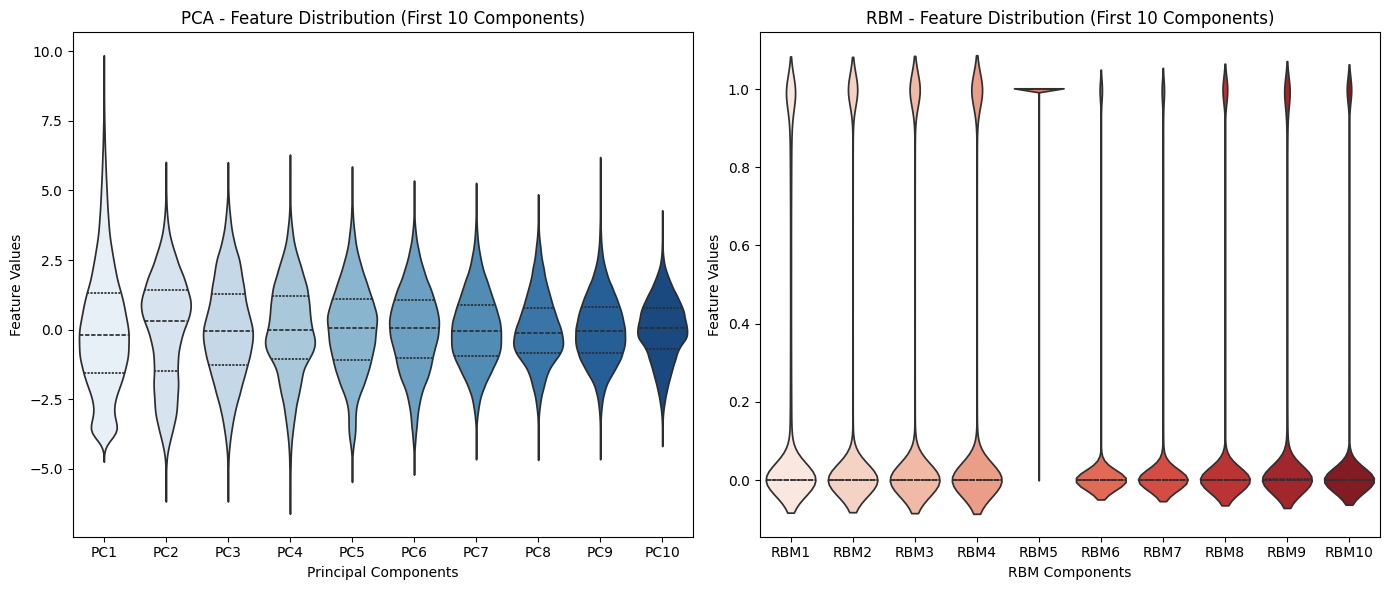

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
X_sample_pca = pd.DataFrame(X_train_pca[:, :10], columns=[f"PC{i+1}" for i in range(10)])
sns.violinplot(data=X_sample_pca, inner="quartile", palette="Blues")
plt.title("PCA - Feature Distribution (First 10 Components)")
plt.xlabel("Principal Components")
plt.ylabel("Feature Values")

plt.subplot(1, 2, 2)
X_sample_rbm = pd.DataFrame(X_train_rbm[:, :10], columns=[f"RBM{i+1}" for i in range(10)])
sns.violinplot(data=X_sample_rbm, inner="quartile", palette="Reds")
plt.title("RBM - Feature Distribution (First 10 Components)")
plt.xlabel("RBM Components")
plt.ylabel("Feature Values")

plt.tight_layout()
plt.show()